In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import datasets, layers, models, regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adagrad, RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization
import random

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [8]:
# One-hot encode
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10, dtype="float32")
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10, dtype="float32")

# Normalize
x_train = x_train/255.0
x_test = x_test/255.0
print('done') # make sure I don't run this code multiple times and keep dividing the data

done


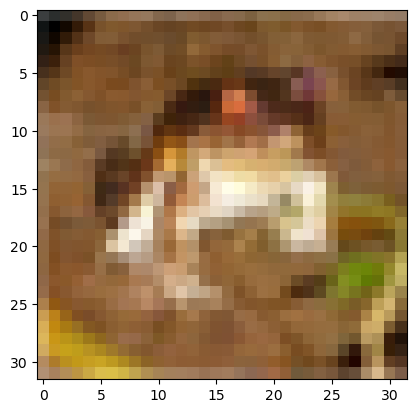

In [9]:
y_train[0:10]
plt.imshow(x_train[0])
indices = random.sample(range(len(x_train)), 50000)
x_train = x_train[indices]
y_train = y_train[indices]

In [10]:
# One or more (convolutional +relu type activation+ pooling) layer
# Dense fully connected MLP with one or more hidden layers.
# Use only 2 or 3 convolutional layers, and 2 or 3 MLP layers.
# Each convolutional layer uses one or more filter.
# Use 2^k different filters in each layer (k=4-8 => 16-256 filters). 
# Each convolutional filter is odd size nxn
# Choose a training optimizer of adagrad or rmsprop.
# Use mini batch of 32-128.
# Apply dropout and regularization to your training.
# Use the real-time data augmentation.
# Finally show testing results after training (train no more than 300 epocs.)
# Define model

# Use the real-time data augmentation.
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range = 0.2)

model = Sequential()

# 3 Convolutional layers
# Each convolutional layer uses 2^k filters with nxn odd shape.
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# MLP layers
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))


# Choose a training optimizer of adagrad or rmsprop.
optimizer = Adagrad(learning_rate = 0.005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


# Train model with data augmentation
datagen.fit(x_train)
datagen.fit(x_test)
batch_size = 125
epochs = 50
CNN = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, steps_per_epoch=len(x_train) / batch_size, validation_split = 0.2)

model.summary()

Epoch 1/50
400/400 [==============================] - 30s 71ms/step - loss: 6.3454 - accuracy: 0.2656 - val_loss: 5.5120 - val_accuracy: 0.3395
Epoch 2/50
400/400 [==============================] - 24s 60ms/step - loss: 5.2110 - accuracy: 0.3731 - val_loss: 4.6271 - val_accuracy: 0.4685
Epoch 3/50
400/400 [==============================] - 30s 75ms/step - loss: 4.5545 - accuracy: 0.4224 - val_loss: 4.1027 - val_accuracy: 0.5059
Epoch 4/50
400/400 [==============================] - 29s 73ms/step - loss: 4.0633 - accuracy: 0.4569 - val_loss: 3.6987 - val_accuracy: 0.5297
Epoch 5/50
400/400 [==============================] - 24s 60ms/step - loss: 3.6793 - accuracy: 0.4864 - val_loss: 3.3862 - val_accuracy: 0.5498
Epoch 6/50
400/400 [==============================] - 22s 55ms/step - loss: 3.3650 - accuracy: 0.5091 - val_loss: 3.1218 - val_accuracy: 0.5678
Epoch 7/50
400/400 [==============================] - 25s 62ms/step - loss: 3.1067 - accuracy: 0.5297 - val_loss: 2.9088 - val_accuracy:

                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total para

In [11]:
# Evaluate model on test dataset
score = model.evaluate(x_test, y_test, batch_size=32)
Yhat = model.predict(x_test, batch_size=32)

313/313 [==============================] - 2s 5ms/step


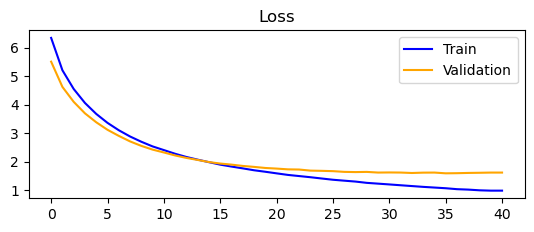

In [12]:
1# Plot Error
plt.subplot(211)
plt.title('Loss')
plt.plot(CNN.history['loss'], color='blue', label='Train')
plt.plot(CNN.history['val_loss'], color='orange', label='Validation')
plt.legend()

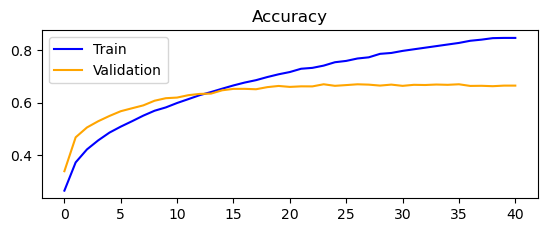

In [13]:
# Plot Accuracy
plt.subplot(212)
plt.title('Accuracy')
plt.plot(CNN.history['accuracy'], color='blue', label='Train')
plt.plot(CNN.history['val_accuracy'], color='orange', label='Validation')
plt.legend()